# Image processing in SciKit-image

This example works through the web page: http://justinbois.github.io/bootcamp/2016/lessons/l38_intro_to_image_processing.html



In [1]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


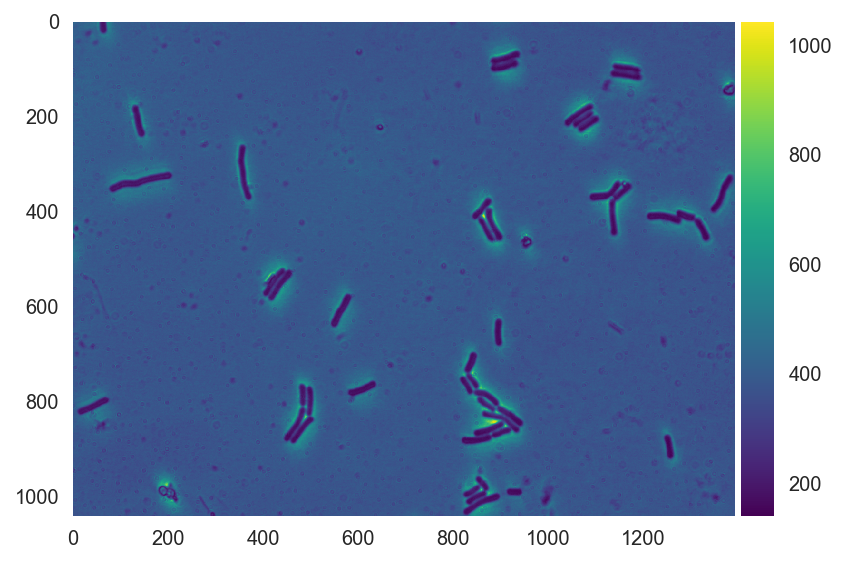

In [3]:
# Load the phase contrast image.
im_phase = skimage.io.imread('data/bsub_100x_phase.tif')

# Display the image, set Seaborn style 'dark' to avoid grid lines
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase)

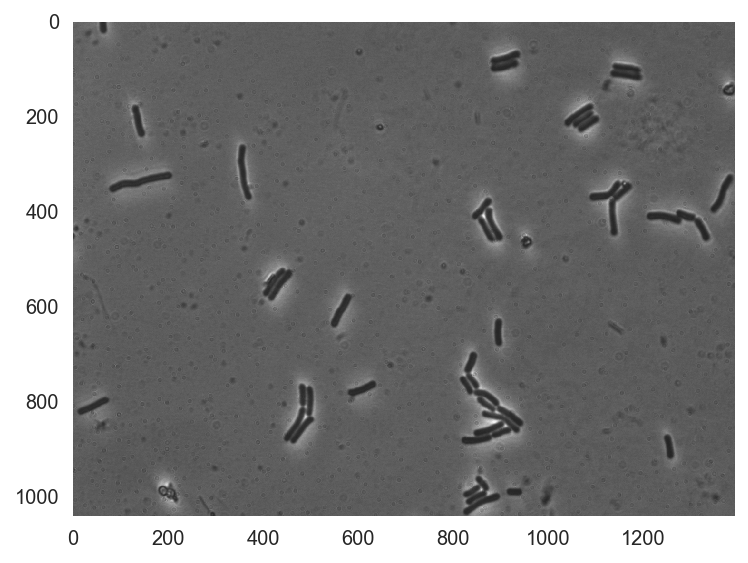

In [4]:
# Display the image
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase / im_phase.max())

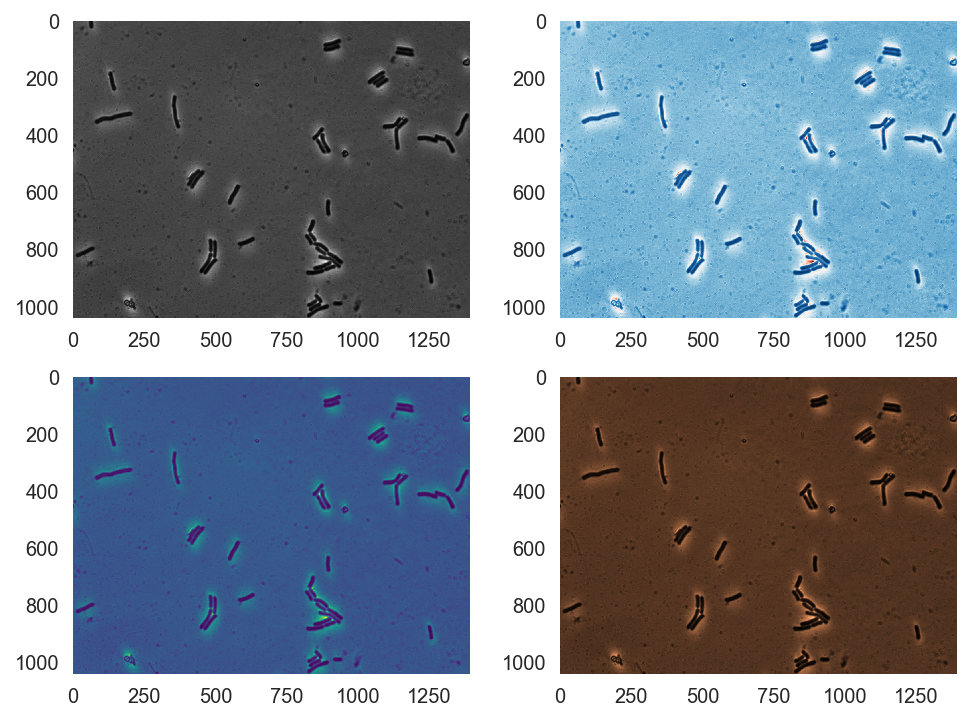

In [5]:
with sns.axes_style('dark'):
    # Get subplots
    fig, ax = plt.subplots(2, 2, figsize=(8,6))

    # Display various LUTs
    ax[0,0].imshow(im_phase, cmap=plt.cm.gray)
    ax[0,1].imshow(im_phase, cmap=plt.cm.RdBu_r)
    ax[1,0].imshow(im_phase, cmap=plt.cm.viridis)
    ax[1,1].imshow(im_phase, cmap=plt.cm.copper)


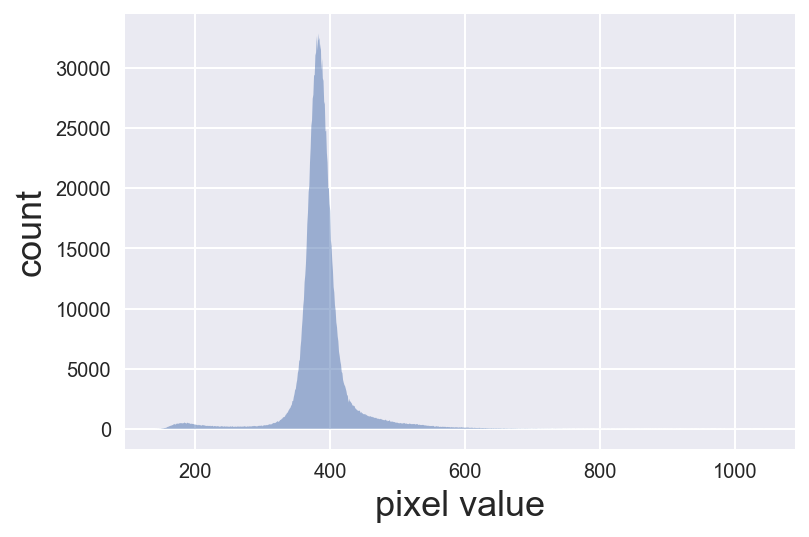

In [6]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(im_phase)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

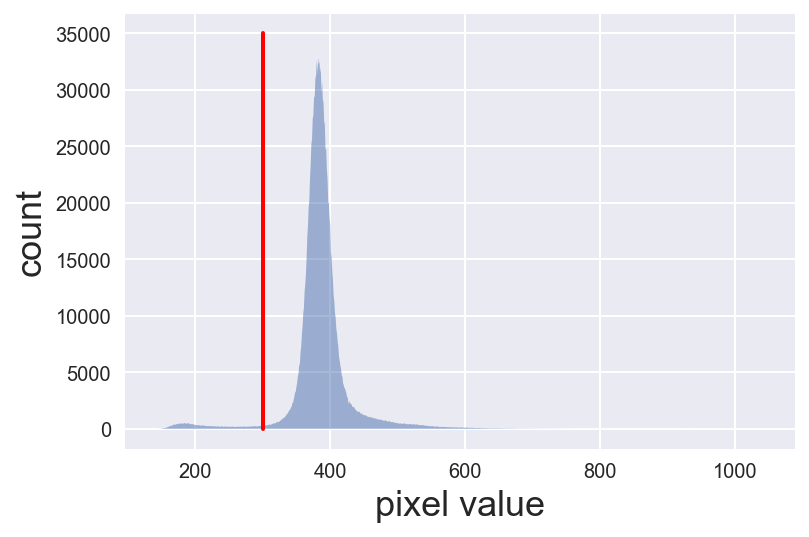

In [13]:
# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_phase, hist_phase, alpha=0.5)
plt.plot([300, 300], [0,35000], linestyle='-', marker='None', color='red')

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

In [14]:
# Threshold value, as obtained by eye
thresh_phase = 350

# Generate thresholded image
im_phase_bw = im_phase < thresh_phase

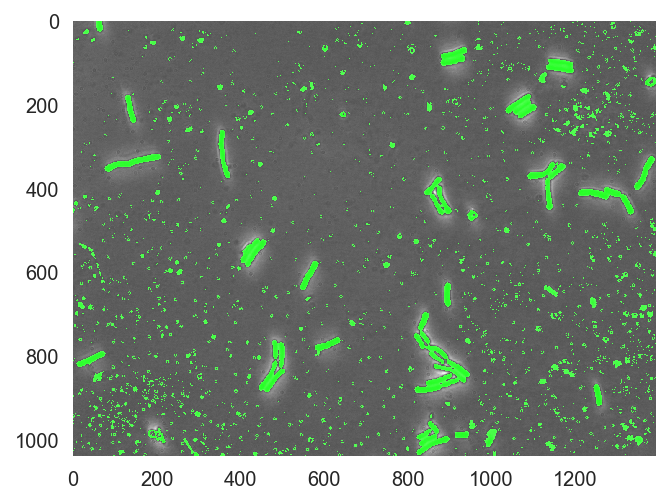

In [15]:
# Build RGB image by stacking grayscale images
im_phase_rgb = np.dstack(3 * [im_phase / np.max(im_phase)])

# Saturate green channel wherever there are white pixels in thresh image
im_phase_rgb[im_phase_bw, 1] = 1.0

# Show the result
with sns.axes_style('dark'):
    plt.imshow(im_phase_rgb)


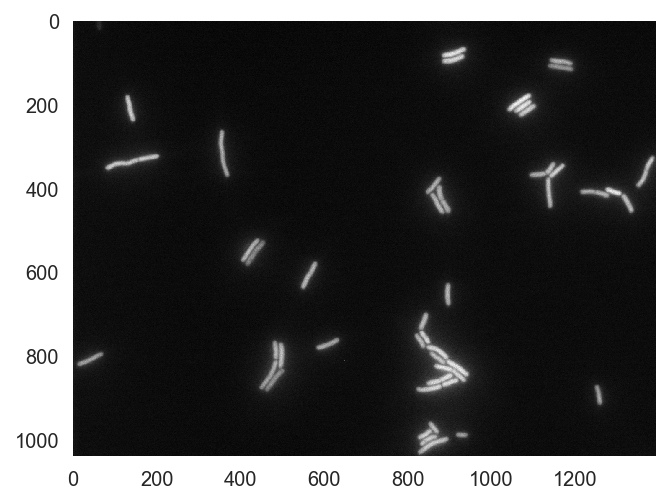

In [16]:
# Load image
im_cfp = skimage.io.imread('data/bsub_100x_CFP.tif')

# Display the image
with sns.axes_style('dark'):
    plt.imshow(im_cfp, cmap=plt.cm.gray)

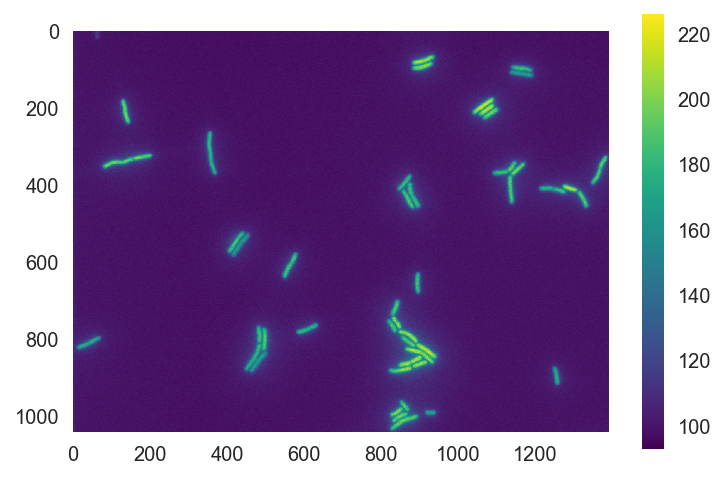

In [17]:
# Display the image with the viridis color map
with sns.axes_style('dark'):
    plt.imshow(im_cfp, cmap=plt.cm.viridis)

    # Add in a color bar
    plt.colorbar()

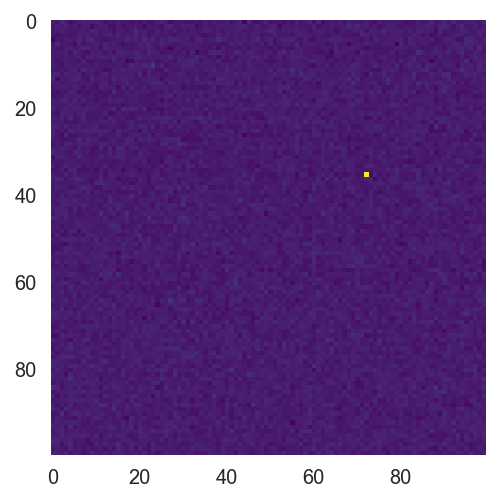

In [18]:
with sns.axes_style('dark'):
    plt.imshow(im_cfp[150:250,450:550] / im_cfp.max(), cmap=plt.cm.viridis)

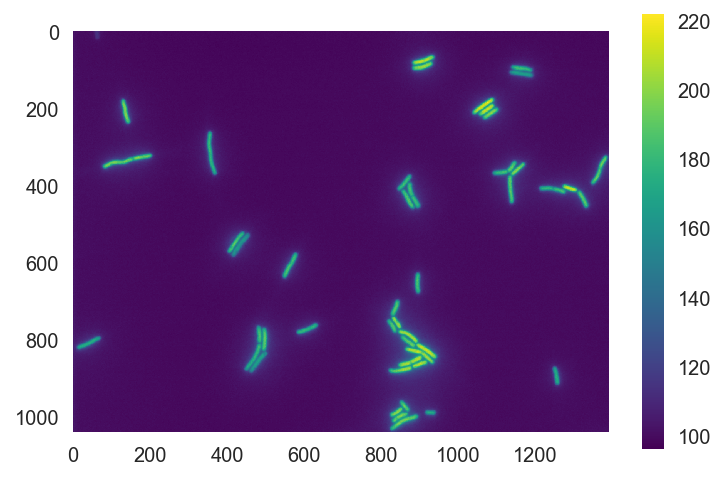

In [19]:
# Make the structuring element
selem = skimage.morphology.square(3)

# Perform the median filter
im_cfp_filt = skimage.filters.median(im_cfp, selem)

# Show filtered image with the viridis LUT. 
with sns.axes_style('dark'):
    plt.imshow(im_cfp_filt, cmap=plt.cm.viridis)
    plt.colorbar()


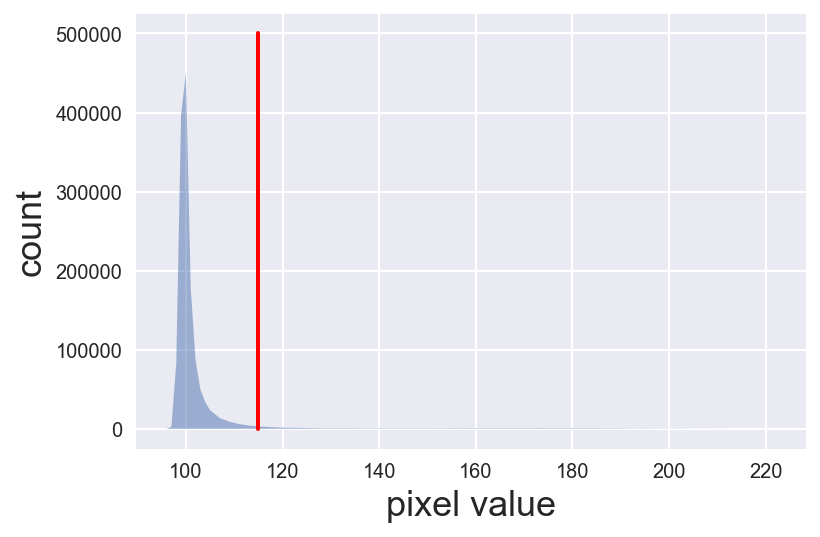

In [20]:
# Get the histogram data
hist_cfp, bins_cfp = skimage.exposure.histogram(im_cfp_filt)

# Use matplotlib to make a pretty plot of histogram data
plt.fill_between(bins_cfp, hist_cfp, alpha=0.5)
plt.plot([115, 115], [0, 500000], 'r-')

# Label axes
plt.xlabel('pixel value')
plt.ylabel('count')

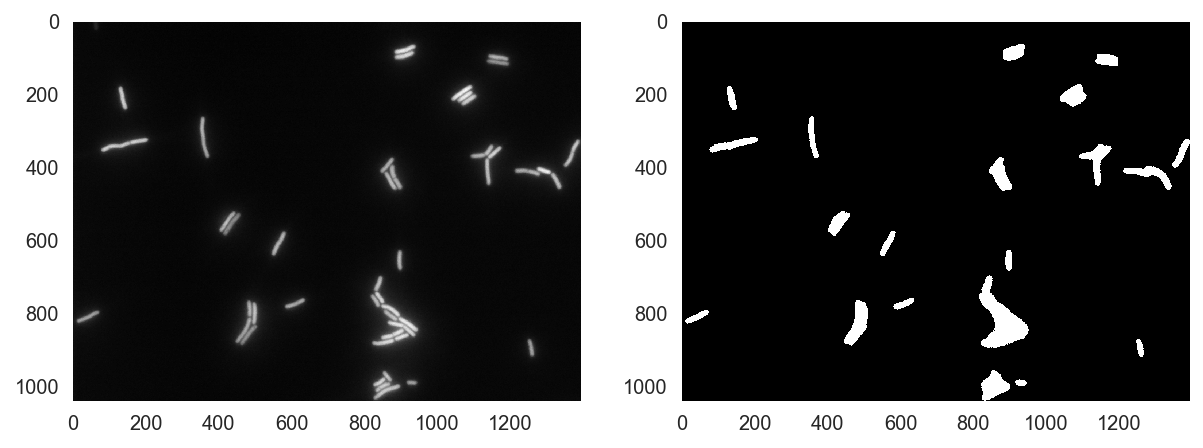

In [21]:
# Threshold value, as obtained by eye
thresh_cfp = 120

# Generate thresholded image
im_cfp_bw = im_cfp_filt > thresh_cfp

# Display phase and thresholded image
with sns.axes_style('dark'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(im_cfp_filt, cmap=plt.cm.gray)
    ax[1].imshow(im_cfp_bw, cmap=plt.cm.gray)

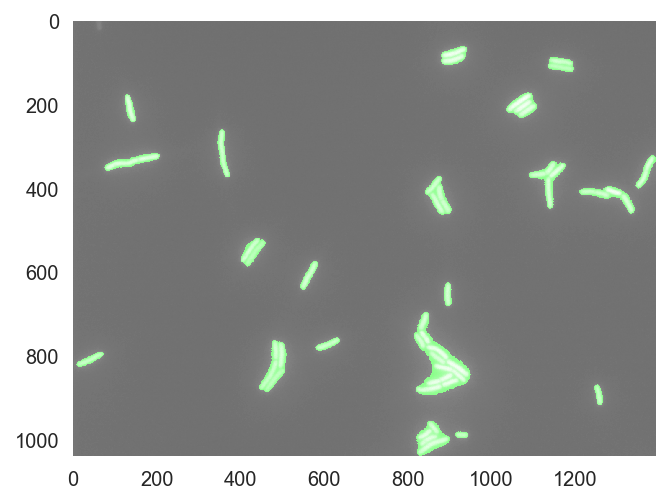

In [22]:
# Build RGB image by stacking grayscale images
im_cfp_rgb = np.dstack(3 * [im_cfp_filt / im_cfp_filt.max()])

# Saturate red channel wherever there are white pixels in thresh image
im_cfp_rgb[im_cfp_bw, 1] = 1.0

# Show the result
with sns.axes_style('dark'):
    plt.imshow(im_cfp_rgb)

In [23]:
# Compute Otsu thresholds for phase and cfp
thresh_phase_otsu = skimage.filters.threshold_otsu(im_phase)
thresh_cfp_otsu = skimage.filters.threshold_otsu(im_cfp_filt)

# Compare results to eyeballing it
print('Phase by eye: ', thresh_phase, '   CFP by eye: ', thresh_cfp)
print('Phase by Otsu:', thresh_phase_otsu,   
      '   CFP by Otsu:', thresh_cfp_otsu)

Phase by eye:  350    CFP by eye:  120
Phase by Otsu: 437    CFP by Otsu: 135


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


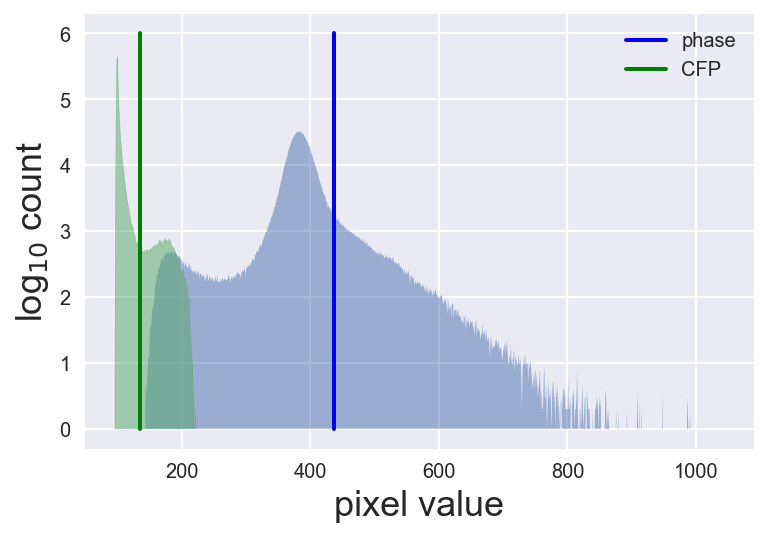

In [24]:
# Plot the histograms together.
plt.fill_between(bins_phase, np.log10(hist_phase), alpha=0.5)
plt.fill_between(bins_cfp, np.log10(hist_cfp), alpha=0.5,
                 color=sns.color_palette()[1])
plt.plot([thresh_phase_otsu, thresh_phase_otsu], [0, 6], 'b-')
plt.plot([thresh_cfp_otsu, thresh_cfp_otsu], [0, 6], 'g-')
plt.legend(('phase', 'CFP'), loc='upper right')

# Label axes
plt.xlabel('pixel value')
plt.ylabel('log$_{10}$ count')

In [25]:
# Compute bacterial area
bacterial_area_pix = im_cfp_bw.sum()

# Print out the result
print('bacterial area =', bacterial_area_pix, 'pixels')

bacterial area = 50703 pixels


In [26]:
# Define interpixel distance
interpix_dist = 0.063 # microns

# Compute bacterial area
bacterial_area_micron = bacterial_area_pix * interpix_dist**2

# Print total area
print('bacterial area =', bacterial_area_micron, 'square microns')

bacterial area = 201.240207 square microns
